## OpenAI Case Study - Method Evaluations

### Initialize Candidate Assistants

In [1]:
from assistant_helpers import create_assistant, prompt_assistant, evaluate_method

#### Method 1 - Naive Assistant
No instruction optimization, no prompt optimization, no temperature optimization

In [2]:
naive_assistant = create_assistant()

#### Method 2 - Simple Prompt
No adjustment to instructions.  Uses simple prompt w/ lowered temperature.

In [3]:
simple_prompt_assistant = create_assistant(temperature=0)

#### Method 3 - Rules-based Instructions
Uses more explicit rules-based instructions and lowered temperature.  Simple prompt.

In [4]:
rules_based_assistant = create_assistant(instructions='You are an assistant that MUST provide complete and untruncated answers. You MUST strictly follow these non-negotiable rules:\n- You MUST prioritize completeness in your response over being concise.\n- When reviewing information in a CSV, you can ONLY base your answer on the full and untruncated content of each field.\n- When processing CSV content, you MUST convert CSV content to a dictionary and ONLY base your answer on the dictionary output.\n- You MUST strictly follow all of these rules.\n-You will NEVER use data frame outputs to answer your question in Code Interpreter.\n\nIf you cannot fully comply with these rules, you MUST explicitly state why.', temperature=0.0)

#### Method 4 - Step-based Instructions
Uses more explicit step-based instructions and lowered temperature. Simple prompt.

In [5]:
step_based_assistant = create_assistant(instructions='You are an assistant that provides full and untruncated responses to questions.  The user will provide a CSV and you will take the following steps to arrive at your answer:\nStep 1 - Convert the CSV to a dictionary.\nStep 2 - Review the FULL contents of the dictionary to understand the context required to answer the question.\nStep 3 - Using ONLY dictionary outputs, answer the user question COMPLETELY and without leaving out ANY details.\n\nFollowing these steps EXACTLY is STRICTLY REQUIRED and NON-NEGOTIABLE.  You MUST NOT use dataframe output in your response.', temperature=0)

#### Method 5 - Function Calls
Uses a function call to force CSV to be processed as JSON; no adjustment to temperature.  Simple prompt.

In [6]:
function_call_assistant = create_assistant(instructions='You are an assistant tasked with providing complete and untruncated answers to questions.  You must prioritize completeness over being concise.  ALL uploaded CSVs need to be converted by the function \'process_csv\' and will be returned as a JSON formatted string.  ALWAYS parse the JSON string before leveraging data to ask a question.', enable_function=True)

### Run evaluations
Run each method through a series of 20 trials

In [ ]:
# Configure assistants and prompts
import pandas as pd

experiments = [
    [naive_assistant, 'Tell me tina escobars favorite city and why'],
    [simple_prompt_assistant, 'Review the attached CSV and extract all information from all fields.  DO NOT use dataframe output to get your answer. Tell me Tina Escobars favorite city and why, including ALL details in the relevant field.'],
    [rules_based_assistant, 'Tell me what tina escobars favorite city is and why'],
    [step_based_assistant, 'Tell me what tina escobars favorite city is and why'],
    [function_call_assistant, 'Tell me what tina escobars favorite city is and why']
    ]

# Run experiments and get results
results = []
averages = []
for experiment in experiments:
    assistant_, prompt_ = experiment

    result = evaluate_method(assistant=assistant_, prompt=prompt_, file_path='tse_takehome_dataset.csv', debug=False, runs=20)

    results.append(result)
    averages.append(pd.to_numeric(result[1]['Accurate']).mean())



### Plot results

C:\Users\bryce\AppData\Local\Temp\ipykernel_45860\2335864872.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


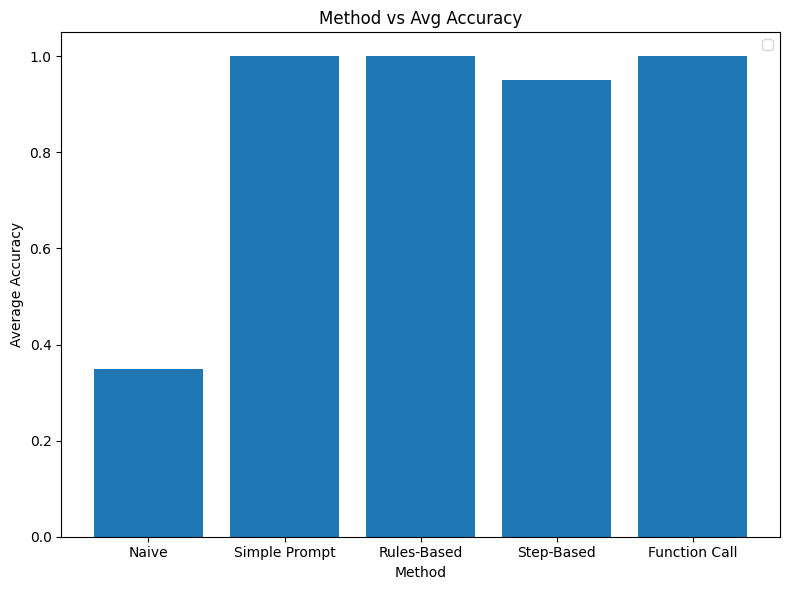

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Create labels
labels = ['Naive','Simple Prompt','Rules-Based','Step-Based','Function Call']

# Create bar plot
plt.figure(figsize=(8, 6))
plt.bar(labels, averages)

# Add labels and title
plt.xlabel("Method")
plt.ylabel("Average Accuracy")
plt.title("Method vs Avg Accuracy")

# Show the plot
plt.legend()
plt.tight_layout()
plt.show()